# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

### 하이퍼 파라미터(Hyper Parameter)

In [2]:
epochs = 1000
lr = 0.1

### 유틸 함수들(Util Functions)

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum(true_y - pred_y)**2)

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1-pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

def differential(f,x):
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val
  return diff_value

### 신경망

In [11]:
class LogicGateNet():
  def __init__(self):
    def weight_init():
      np.random.seed(1)
      weights = np.random.randn(2)
      bias = np.random.rand(1)

      return weights, bias

    self.weights, self.bias = weight_init()

  def predict(self, x):
    W = self.weights.reshape(-1,1)
    b = self.bias

    pred_y = sigmoid(np.dot(x, W) + b)
    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grad_W = differential(loss_grad, self.weights)
    grad_B = differential(loss_grad, self.bias)

    return grad_W, grad_B


### AND Gate

#### 모델 생성 및 학습

In [13]:
AND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[0],[0],[1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = AND.get_gradient(X, Y)

  AND.weights -= lr * grad_W
  AND.bias -= lr * grad_B

  loss = AND.loss(X,Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, AND.weights, AND.bias))


Epoch: 100, Cost: 0.6886489498064596, Weights: [1.56426876 0.79168393], Bias: [-2.14871589]
Epoch: 200, Cost: 0.4946368603056357, Weights: [2.01360719 1.71241131], Bias: [-3.07894028]
Epoch: 300, Cost: 0.3920165980744903, Weights: [2.42841657 2.29753793], Bias: [-3.79103207]
Epoch: 400, Cost: 0.32572143747907645, Weights: [2.794852   2.73235738], Bias: [-4.37257095]
Epoch: 500, Cost: 0.27863601334681387, Weights: [3.11636193 3.08408364], Bias: [-4.86571237]
Epoch: 600, Cost: 0.24328504683852972, Weights: [3.40015395 3.38235762], Bias: [-5.29433736]
Epoch: 700, Cost: 0.21572536552486304, Weights: [3.65300561 3.64264217], Bias: [-5.67349792]
Epoch: 800, Cost: 0.1936324442837598, Weights: [3.88044124 3.87412053], Bias: [-6.01340133]
Epoch: 900, Cost: 0.1755321312791929, Weights: [4.08680123 4.08279091], Bias: [-6.32133891]
Epoch: 1000, Cost: 0.16043926933325997, Weights: [4.27548114 4.27284863], Bias: [-6.6027234]


#### 테스트

In [14]:
print(AND.predict(X))

[[0.00135483]
 [0.08867878]
 [0.08889176]
 [0.87496677]]


### OR Gate

#### 모델 생성 및 학습

In [27]:
OR = LogicGateNet()

X = np.array([[0, 0],[0, 1],[1, 0], [1, 1]])
Y_2 = np.array([[0],[1],[1],[1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = OR.get_gradient(X, Y_2)

  OR.weights -= lr * grad_W
  OR.bias -= lr * grad_B

  loss = OR.loss(X, Y_2)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, OR.weights, OR.bias))

Epoch: 100, Cost: 0.4958092384815969, Weights: [2.45484353 1.40566594], Bias: [-0.14439625]
Epoch: 200, Cost: 0.3398674231516072, Weights: [2.98631846 2.39448393], Bias: [-0.67661178]
Epoch: 300, Cost: 0.25733609861825163, Weights: [3.45016595 3.08431266], Bias: [-1.03721585]
Epoch: 400, Cost: 0.20630142190030487, Weights: [3.85230067 3.60865952], Bias: [-1.30598633]
Epoch: 500, Cost: 0.17165499221120914, Weights: [4.20195872 4.03000824], Bias: [-1.52060015]
Epoch: 600, Cost: 0.14665018845468802, Weights: [4.50867681 4.38171478], Bias: [-1.6994397]
Epoch: 700, Cost: 0.12779768649418508, Weights: [4.78049264 4.68334611], Bias: [-1.8527641]
Epoch: 800, Cost: 0.11310517185398535, Weights: [5.0237707 4.9472786], Bias: [-1.98691756]
Epoch: 900, Cost: 0.10135180918374054, Weights: [5.24347159 5.18181684], Bias: [-2.10611973]
Epoch: 1000, Cost: 0.0917484300860403, Weights: [5.44346811 5.39279833], Bias: [-2.21332947]


#### 테스트

In [28]:
print(OR.predict(X))

[[0.09855987]
 [0.9600543 ]
 [0.96195283]
 [0.9998201 ]]


### NAND Gate

#### 모델 생성 및 학습

In [29]:
NAND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_3 = np.array([[1], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = NAND.get_gradient(X, Y_3)

  NAND.weights -= lr * grad_W
  NAND.bias -= lr * grad_B

  loss = NAND.loss(X, Y_3)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, NAND.weights, NAND.bias))

Epoch: 100, Cost: 0.7911738653752329, Weights: [-0.48972722 -1.25798774], Bias: [1.74566135]
Epoch: 200, Cost: 0.543049095786558, Weights: [-1.51545093 -1.80261804], Bias: [2.79151756]
Epoch: 300, Cost: 0.42125913027213824, Weights: [-2.14614496 -2.26642639], Bias: [3.56506179]
Epoch: 400, Cost: 0.3456117101517592, Weights: [-2.607325   -2.66303355], Bias: [4.18521187]
Epoch: 500, Cost: 0.2931298605175886, Weights: [-2.97696333 -3.00501941], Bias: [4.70528682]
Epoch: 600, Cost: 0.2543396785999729, Weights: [-3.28850585 -3.30365261], Bias: [5.1539571]
Epoch: 700, Cost: 0.2244391859677557, Weights: [-3.55912171 -3.56778782], Bias: [5.54869527]
Epoch: 800, Cost: 0.20067626330787763, Weights: [-3.7989077  -3.80411461], Bias: [5.90108417]
Epoch: 900, Cost: 0.1813412551756729, Weights: [-4.01441395 -4.01767547], Bias: [6.21926514]
Epoch: 1000, Cost: 0.16530944081672722, Weights: [-4.21019696 -4.21231432], Bias: [6.50920952]


#### 테스트

In [30]:
print(NAND.predict(X))

[[0.99851256]
 [0.90861957]
 [0.90879523]
 [0.12861037]]


### XOR Gate

#### 모델 생성 및 학습

In [31]:
XOR = LogicGateNet()

X = np.array([[0, 0],[0, 1], [1, 0], [1, 1]])
Y_4 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = XOR.get_gradient(X, Y_4)

  XOR.weights -= lr * grad_W
  XOR.bias -= lr * grad_B

  loss = XOR.loss(X, Y_4)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, XOR.weights, XOR.bias))

Epoch: 100, Cost: 1.4026852245460188, Weights: [ 0.47012771 -0.19931523], Bias: [-0.16097708]
Epoch: 200, Cost: 1.3879445622848803, Weights: [ 0.1572739  -0.03387161], Bias: [-0.07321056]
Epoch: 300, Cost: 1.3864920300483525, Weights: [0.05525161 0.00089673], Bias: [-0.03330094]
Epoch: 400, Cost: 1.3863236205352125, Weights: [0.02049628 0.00504503], Bias: [-0.01514784]
Epoch: 500, Cost: 1.38629947436468, Weights: [0.0080051  0.00361297], Bias: [-0.00689034]
Epoch: 600, Cost: 1.3862953430687432, Weights: [0.00326661 0.00201812], Bias: [-0.00313421]
Epoch: 700, Cost: 1.3862945581495087, Weights: [0.00137938 0.00102449], Bias: [-0.00142566]
Epoch: 800, Cost: 1.3862944013903693, Weights: [0.00059716 0.00049628], Bias: [-0.00064849]
Epoch: 900, Cost: 1.3862943694120304, Weights: [0.00026303 0.00023435], Bias: [-0.00029498]
Epoch: 1000, Cost: 1.386294362832352, Weights: [0.0001172  0.00010905], Bias: [-0.00013418]


#### 테스트

In [32]:
print(XOR.predict(X)) # XOR 문제이다.해결 -> layer를 다층 구조로 해야함(다층 퍼셉트론)

[[0.49996646]
 [0.49999372]
 [0.49999575]
 [0.50002302]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [33]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.array([s1, s2]).T.reshape(-1, 2)

#### 테스트

In [34]:
print(AND.predict(X_2))

[[0.12870357]
 [0.79966936]
 [0.80108545]
 [0.14420781]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [43]:
class XORNet():

  def __init__(self):
    np.random.seed(1)

    def weight_init():
      params = {}
      params['w_1'] = np.random.randn(2)
      params['b_1'] = np.random.randn(2)
      params['w_2'] = np.random.randn(2)
      params['b_2'] = np.random.randn(1)
      return params

    self.params = weight_init()

  def predict(self, x):
    W_1, W_2 = self.params['w_1'].reshape(-1, 1), self.params['w_2'].reshape(-1, 1)
    B_1, B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W_2) + B_2
    pred_y = sigmoid(A2)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grads = {}
    grads['w_1'] = differential(loss_grad, self.params['w_1'])
    grads['b_1'] = differential(loss_grad, self.params['b_1'])
    grads['w_2'] = differential(loss_grad, self.params['w_2'])
    grads['b_2'] = differential(loss_grad, self.params['b_2'])

    return grads

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [44]:
lr = 0.3

#### 모델 생성 및 학습

In [45]:
XOR = XORNet()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grads = XOR.get_gradient(X, Y_5)

  for key in ('w_1', 'b_1', 'w_2', 'b_2'):
    XOR.params[key] -= lr * grads[key]

  loss = XOR.loss(X, Y_5)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}".format(i+1, loss))

Epoch: 100, Cost: 1.2038602915397818
Epoch: 200, Cost: 0.48556256977597356
Epoch: 300, Cost: 0.22618525574337325
Epoch: 400, Cost: 0.13938405098194928
Epoch: 500, Cost: 0.0990677322807521
Epoch: 600, Cost: 0.07631544967766621
Epoch: 700, Cost: 0.06184796121701281
Epoch: 800, Cost: 0.051889166294454614
Epoch: 900, Cost: 0.04463774048835388
Epoch: 1000, Cost: 0.039132482176113925


#### 테스트

In [46]:
print(XOR.predict(X))

[[0.01739414]
 [0.97447579]
 [0.98282956]
 [0.01738964]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST

#### 필요한 모듈 임포트

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [49]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#### 데이터 확인

In [51]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


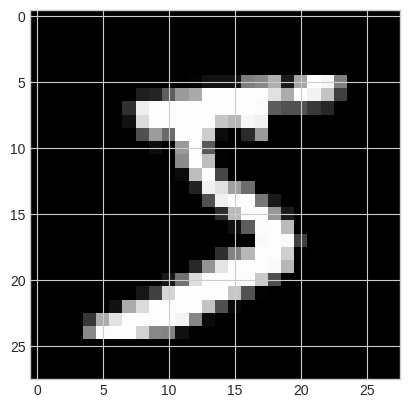

In [52]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

In [53]:
y_train[0]

5

#### 데이터 전처리 (Data Preprocessing)

In [80]:
def flatten_for_mnist(x): # input 다차원 배열(x)를 2차원으로 flatten(이미지 데이터에서 자주 활용됨)
  temp = np.zeros((x.shape[0], x[0].size))

  for idx, data in enumerate(x):
    temp[idx, :] = data.flatten() # 다차원 데이터를 1차원 배열로 변환 후 temp의 idx번째 행에 평탄화된 데이터 저장
  return temp

In [82]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # 입력 데이터를 255로 나누어 정규화 (픽셀 값이 0.0~1.0 사이로 변환되면서 학습을 안정적으로 수행할 수 있음)

x_train = flatten_for_mnist(x_train) # 모델이 일렬로 된 벡터로 처리할 수 있도록 데이터를 2차원으로 평탄화
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

y_train_ohe = tf.one_hot(y_train, depth=10).numpy() #정수 레이블을 원-핫 벡터로 변환
y_test_ohe = tf.one_hot(y_test, depth=10).numpy() #텐서를 numpy 배열로 변환

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [83]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 하이퍼 파라미터(Hyper Parameter)

In [87]:
epochs = 5
lr =0.1
batch_size = 100
train_size = x_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [88]:
# Sigmoid 함수:
# - 신경망에서 자주 사용되는 활성화 함수.
# - 입력 x를 0과 1 사이의 값으로 변환.
# - 작은 x에서는 0에 가까운 값, 큰 x에서는 1에 가까운 값 출력.
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 평균제곱오차 Mean Squared Error (MSE)
# - 예측값(pred_y)과 실제값(true_y)의 차이를 제곱한 값을 반환.
# - 회귀 문제에서 손실 함수로 자주 사용됨.
# - 0.5를 곱하는 이유는 미분 시 계산을 간단하게 하기 위해.
def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

# 교차 엔트로피 오차:
# - 다중 클래스 분류 문제에서 자주 사용되는 손실 함수.
# - 예측값(pred_y)과 실제값(true_y) 간의 확률 분포 차이를 계산.
# - delta=1e-7: 로그 계산 시 0으로 나누는 오류를 방지.
def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)
  delta = 1e-7
  return -np.sum(true_y * np.log(pred_y + delta))

# 배치 교차 엔트로피 오차:
# - 여러 데이터를 한 번에 처리하는 배치 학습용 손실 함수.
# - 전체 배치에 대해 평균 교차 엔트로피 값을 계산.
# - 배치 크기(batch_size)를 나누어 평균화.
def cross_entropy_error_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)
  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

# 이진 분류용 교차 엔트로피 오차:
# - 출력값이 0 또는 1인 이진 분류 문제에 사용.
# - 예측값(pred_y)이 두 클래스 확률로 나타나는 경우 활용.
def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))


# Softmax 함수:
# - 출력값을 확률 분포로 변환.
# - 각 원소의 값이 전체 합(1.0)을 이루는 확률로 변환됨.
# - 다중 클래스 분류 문제의 출력층에서 자주 사용.
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

# 1차원 함수의 미분 계산:
# - 함수 f에 대해 x의 각 요소에 대한 기울기를 계산.
# - 중심 차분 방식을 사용하여 수치 미분 계산 (h = 2 * eps).
def differential_1d(f, x):

  eps = 1e-5
  diff_value = np.zeros_like(x)

  try:
    len(x)
  except TypeError:
    x = np.array([x])

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

  return diff_value

# 2차원 배열에 대한 미분 계산:
# - 각 요소에 대해 기울기를 계산.
# - 중심 차분 방식으로 각 요소별 미분 값을 구함.
# - 1차원 또는 2차원 배열 입력을 처리.
def differential_2d(f, x):
    eps = 1e-4  # 작은 값
    grad = np.zeros_like(x)

    # 1차원 배열인지, 2차원 배열인지 확인
    if x.ndim == 1:  # 1차원 배열 처리
        for i in range(x.shape[0]):
            temp_val = x[i]
            x[i] = temp_val + eps
            f_h1 = f(x).item()  # 스칼라 값으로 변환
            x[i] = temp_val - eps
            f_h2 = f(x).item()  # 스칼라 값으로 변환
            grad[i] = (f_h1 - f_h2) / (2 * eps)
            x[i] = temp_val
    elif x.ndim == 2:  # 2차원 배열 처리
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                temp_val = x[i, j]
                x[i, j] = temp_val + eps
                f_h1 = f(x).item()  # 스칼라 값으로 변환
                x[i, j] = temp_val - eps
                f_h2 = f(x).item()  # 스칼라 값으로 변환
                grad[i, j] = (f_h1 - f_h2) / (2 * eps)
                x[i, j] = temp_val
    else:
        raise ValueError("Input x must be either 1D or 2D array.")

    return grad


#### 2층 신경망으로 구현

In [89]:
class MyModel(object):

  def __init__(self):

    def weight_init(input_nodes, hidden_nodes, output_units):
      np.random.seed(777) # 난수 시드를 고정하여 실행 시 동일한 결과 보장

      params = {}
      # "입력층" -> "은닉층" 가중치 및 편향 초기화
      params['w_1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes)
      params['b_1'] = np.zeros(hidden_nodes)
      # "은닉층" -> "출력층" 가중치 및 편향 초기화
      params['w_2'] = 0.01 * np.random.randn(hidden_nodes, output_units)
      params['b_2'] = np.zeros(output_units)

      return params
    # 가중치와 편향 초기화
    self.params = weight_init(784, 64, 10)# 입력 노드 784 (28x28 이미지), 은닉층 노드 64, 출력 노드 10 (클래스 0~9)

  def predict(self, x):
    W_1, W_2 = self.params['w_1'], self.params['w_2']
    B_1, B_2 = self.params['b_1'], self.params['b_2']
    # 입력층 → 은닉층
    A1 = np.dot(x, W_1) + B_1 # 선형 변환, 입력 데이터 x와 가중치 W_1를 곱하고 편향 B_1을 더함.
    Z1 = sigmoid(A1) # 비선형 활성화 함수 (Sigmoid) 활성화 함수 sigmoid를 통해 비선형성을 추가
    # 은닉층 → 출력층
    A2 = np.dot(Z1, W_2) + B_2 # 선형 변환 , 은닉층 출력 Z1과 가중치 W_2를 곱하고 편향 B_2를 더함.
    pred_y = softmax(A2) # 출력층 활성화 함수 (Softmax) Softmax 함수로 클래스 확률 계산

    return pred_y

  def loss(self, x, true_y): #  예측값(pred_y)과 실제값(true_y)의 차이를 계산하는 목적
    pred_y = self.predict(x) # 예측값 계산
    return cross_entropy_error_for_bin(pred_y, true_y) # 이진 교차 엔트로피 오차 계산

  def accuracy(self, x, true_y): # 예측값 계산
    pred_y = self.predict(x)
    y_argmax = np.argmax(pred_y, axis = 1) # 예측값의 가장 높은 확률 클래스
    t_argmax = np.argmax(true_y, axis = 1) # 실제값의 정답 클래스

    accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0]) # 정확도 계산

    return accuracy

  def get_gradient(self, x, t):

    def loss_grad(grad):
      return self.loss(x, t)

    grads = {}
    # 각 가중치 및 편향에 대해 손실 함수의 기울기 계산
    # 손실 함수의 각 가중치(w_1, w_2)와 편향(b_1, b_2)에 대한 기울기를 계산.
    # differential_2d 함수는 각 파라미터의 수치적 미분값을 반환.
    grads['w_1'] = differential_2d(loss_grad, self.params['w_1'])
    grads['b_1'] = differential_2d(loss_grad, self.params['b_1'])
    grads['w_2'] = differential_2d(loss_grad, self.params['w_2'])
    grads['b_2'] = differential_2d(loss_grad, self.params['b_2'])

    return grads

#### 모델 생성 및 학습
- 시간 많이 소요

In [90]:
model = MyModel()

# 학습 과정에서 손실값(train_loss), 학습 정확도(train_acc), 테스트 정확도(test_acc)를 저장할 리스트.
train_loss_list = list()
train_acc_list = list()
test_acc_list = list()

# 한 에포크(epoch) 동안 반복해야 할 횟수 계산.
# train_size: 학습 데이터 크기.
# batch_size: 배치 크기. 매번 학습할 데이터 개수.
# max(): 최소 반복 횟수를 1로 설정.
iter_per_epoch = max(train_size/batch_size, 1)

start_time = time.time()

for i in tqdm(range(epochs)):

  batch_idx = np.random.choice(train_size, batch_size, replace=False)
  x_batch = x_train[batch_idx] # train_size에서 batch_size만큼 샘플을 랜덤으로 선택 (중복 허용 안 함).
  y_batch = y_train_ohe[batch_idx] # 선택된 인덱스를 이용해 학습 데이터와 레이블에서 배치 데이터 생성.

  grads = model.get_gradient(x_batch, y_batch) # 배치 데이터(x_batch, y_batch)를 이용해 손실 함수의 기울기 계산.

  # 계산된 기울기(grads)를 이용해 경사 하강법으로 모델의 파라미터 업데이트.
  # lr: 학습률(learning rate). 업데이트 크기를 조절.
  for key in grads.keys():
    model.params[key] -= lr * grads[key]

  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss) # 현재 배치의 손실 값을 계산하고, 리스트에 저장.

  train_accuracy = model.accuracy(x_train, y_train_ohe) # 학습 데이터 전체와 테스트 데이터 전체에 대해 정확도 계산.
  test_accuracy = model.accuracy(x_test, y_test_ohe)
  train_acc_list.append(train_accuracy) # 정확도를 리스트에 저장.
  test_acc_list.append(test_accuracy)

  print("Epoch: {}, Cost: {}, Train Accuracy: {}, Test Accuracy: {}".format(i+1, loss, train_accuracy, test_accuracy))

end_time = time.time()
print("총 학습 소요 시간: {:.3f}s".format(end_time - start_time))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1, Cost: 516.5147652725685, Train Accuracy: 0.09751666666666667, Test Accuracy: 0.0974
Epoch: 2, Cost: 353.1229733630522, Train Accuracy: 0.09736666666666667, Test Accuracy: 0.0982
Epoch: 3, Cost: 350.61651085167864, Train Accuracy: 0.10415, Test Accuracy: 0.0982
Epoch: 4, Cost: 349.1803460418622, Train Accuracy: 0.11178333333333333, Test Accuracy: 0.0982
Epoch: 5, Cost: 345.3982282174535, Train Accuracy: 0.10023333333333333, Test Accuracy: 0.0982
총 학습 소요 시간: 300.381s


### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재